# Analysis of selected funds

Main insights:
    - ~3700 unique funds over the complete timeframe
    - Strong break in 2010 (few observations before)
    - ~2500 unique funds per year
    - ~6% of funds change their lipper class over the complete timeframe
    

In [23]:
import feather
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Convert to date format
begin_date = '2010-01-01' 
end_date   = '2019-12-31'

In [45]:
path = '../data/processed/row_info.feather'
info_df = feather.read_dataframe(path)

In [46]:
info_df = info_df.query('report_dt >= @begin_date and report_dt <= @end_date')

In [47]:
info_df.sample()

,crsp_fundno,crsp_portno,fund_name,report_dt,lipper_class,cap_class,style_class,row
19587,31327,1024146,Vanguard Horizon Funds: Vanguard Capital Oppor...,2016-03-31,MLGE,M,G,19587


## Number of unique port_nos and fund_nos

In [48]:
info_df['report_dt'].describe()

count                   50237
unique                     24
top       2010-09-30 00:00:00
freq                     2466
first     2010-03-31 00:00:00
last      2018-12-31 00:00:00
Name: report_dt, dtype: object

In [49]:
print(info_df['crsp_portno'].nunique())
print(info_df['crsp_fundno'].nunique())

3386
3386


## Number of unique funds per year

#### Something seems odd
Break in 2009 not clear

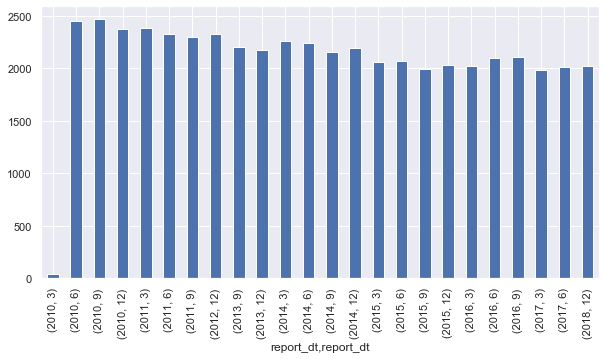

In [55]:
# Analysis of selected funds
sns.set()
(info_df["crsp_portno"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
           figsize=(10,5)))

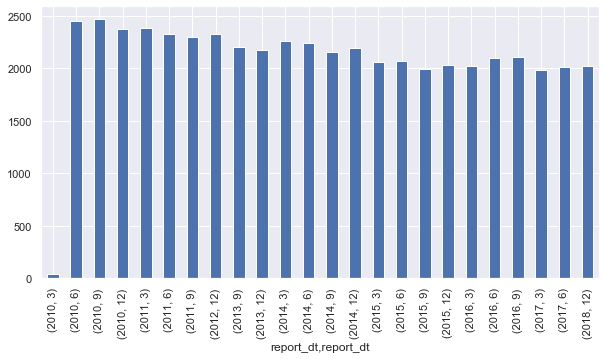

In [51]:
# Analysis of selected funds
sns.set()
## Distribution by date(info_df["report_dt"]
(info_df["crsp_portno"]
    .groupby([
         info_df["report_dt"].dt.year,
         info_df["report_dt"].dt.month
     ])
     .nunique()
     .plot(kind="bar",
           color = 'b',
           figsize=(10,5)))

## Distribution by number of observations per fund 

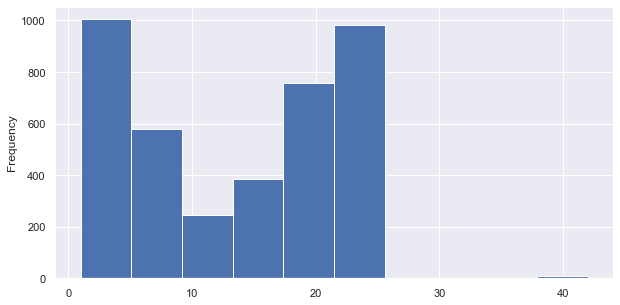

In [31]:
(info_df["crsp_portno"]
     .groupby([
         info_df["crsp_portno"],
     ])
     .count()
     .plot(kind="hist",
           bins = 10,
           color = 'b',
           figsize=(10,5)))

## Take only the end of the year observation per fund

In [32]:
index = (info_df
     .assign(year = info_df["report_dt"].dt.year)
     .groupby(['crsp_portno','year'])
     [['crsp_portno','report_dt']]
     .tail(1)
     .index)

In [33]:
info_df = info_df.loc[index]

## Distribution by lipper_class

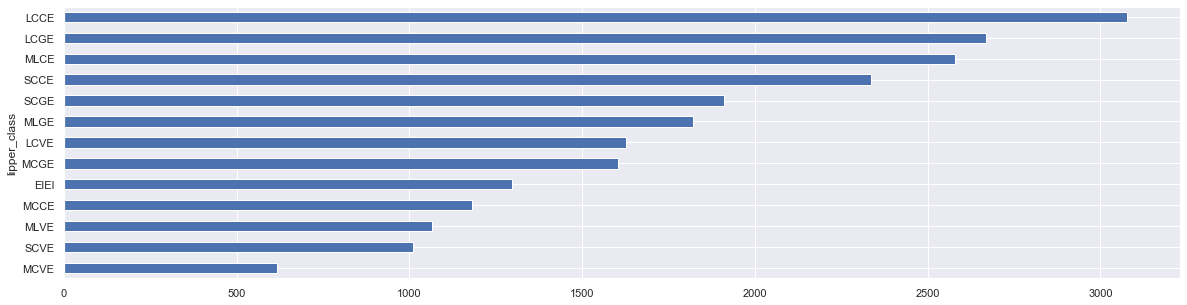

In [34]:
(info_df['crsp_portno']
     .groupby([
         info_df["lipper_class"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,5)))

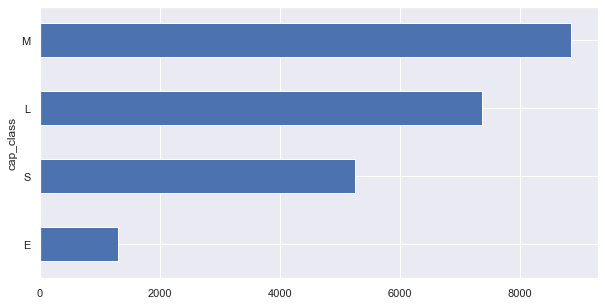

In [35]:
(info_df['crsp_portno']
     .groupby([
         info_df['cap_class'],
     ])
     .count()
     .sort_values()
     .plot(kind='barh',
           color = 'b',
           figsize=(10,5)))

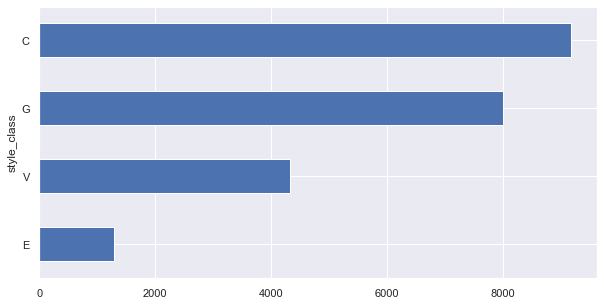

In [36]:
(info_df['crsp_portno']
     .groupby([
         info_df['style_class'],
     ])
     .count()
     .sort_values()
     .plot(kind='barh',
           color = 'b',
           figsize=(10,5)))

## How often do lipper_classes change?


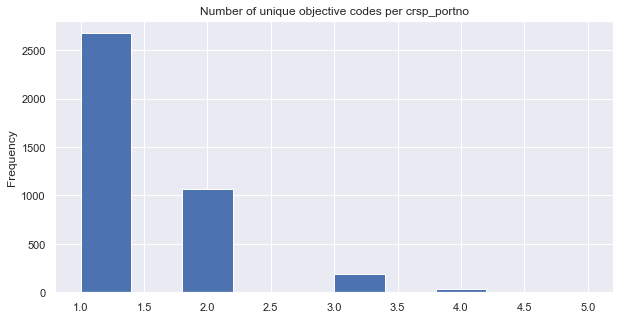

In [37]:
obj_per_portno = info_df[['crsp_portno','lipper_class']]
ax = (obj_per_portno['lipper_class']
    .groupby([
        obj_per_portno["crsp_portno"]
    ])
    .nunique()
    .sort_values()
    .plot(kind='hist',
          color = 'b',
          bins = 10,
          figsize=(10,5),
          title='Number of unique objective codes per crsp_portno')
)

In [38]:
lagged_class = info_df[['crsp_portno','report_dt','lipper_class']]

lagged_class = lagged_class.assign(lag_lipper_class = lagged_class.lipper_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.lipper_class, lagged_class.lag_lipper_class, normalize = 'all') * 100,2)

lag_lipper_class,EIEI,LCCE,LCGE,LCVE,MCCE,MCGE,MCVE,MLCE,MLGE,MLVE,SCCE,SCGE,SCVE
lipper_class,,,,,,,,,,,,,
EIEI,5.62,0.02,0.01,0.02,0.01,0.01,0.01,0.00,0.01,0.04,0.00,0.00,0.01
LCCE,0.02,12.21,0.24,0.29,0.00,0.00,0.00,0.45,0.09,0.05,0.00,0.00,0.00
LCGE,0.00,0.23,10.90,0.00,0.01,0.00,0.00,0.06,0.41,0.00,0.00,0.00,0.00
LCVE,0.05,0.53,0.01,6.34,0.00,0.00,0.00,0.10,0.01,0.21,0.00,0.00,0.00
MCCE,0.00,0.01,0.00,0.00,4.27,0.16,0.32,0.24,0.03,0.04,0.10,0.01,0.01
MCGE,0.00,0.00,0.00,0.00,0.20,6.43,0.00,0.01,0.28,0.00,0.01,0.11,0.00
MCVE,0.01,0.01,0.00,0.00,0.25,0.01,2.19,0.04,0.00,0.10,0.02,0.00,0.06
MLCE,0.01,0.57,0.10,0.07,0.20,0.04,0.05,9.46,0.31,0.25,0.02,0.00,0.01
MLGE,0.00,0.02,0.53,0.00,0.02,0.34,0.00,0.37,6.79,0.03,0.00,0.00,0.00


In [39]:
lagged_class = info_df[['crsp_portno','report_dt','style_class']]

lagged_class = lagged_class.assign(lag_style_class = lagged_class.style_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

pd.crosstab(lagged_class.style_class, lagged_class.lag_style_class)

lag_style_class,C,E,G,V
style_class,,,,
C,6981,6,240,327
E,5,1058,5,14
G,228,0,6391,6
V,336,12,7,3209


In [40]:
lagged_class = info_df[['crsp_portno','report_dt','cap_class']]

lagged_class = lagged_class.assign(lag_cap_class = lagged_class.cap_class.shift())
lagged_class = lagged_class.dropna()

mask = lagged_class.groupby(by = 'crsp_portno').head(1).index
lagged_class = lagged_class[~lagged_class.index.isin(mask)]

round(pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True, normalize= 'all') *100,2)

lag_cap_class,E,L,M,S,All
cap_class,,,,,
E,5.62,0.05,0.07,0.01,5.75
L,0.07,30.75,1.39,0.00,32.21
M,0.01,1.74,36.58,0.33,38.66
S,0.01,0.00,0.47,22.91,23.38
All,5.72,32.54,38.50,23.24,100.00


In [41]:
pd.crosstab(lagged_class.cap_class, lagged_class.lag_cap_class, margins = True)

lag_cap_class,E,L,M,S,All
cap_class,,,,,
E,1058,10,13,1,1082
L,14,5789,261,0,6064
M,2,327,6886,62,7277
S,2,0,88,4312,4402
All,1076,6126,7248,4375,18825


### Fund names

In [42]:
info_df['fund_name'].unique()

array(['AIM Counselor Series Trust (Invesco Counselor Series Trust): Invesco Equity & Income Fund; Class A Shares',
       'JPMorgan Trust II: JPMorgan Diversified Mid Cap Value Fund; Class A Shares',
       'JPMorgan Trust II: JPMorgan Diversified Mid Cap Growth Fund; Ultra Shares',
       ...,
       'EQ Advisors Trust: EQ/Franklin Rising Dividends Portfolio; Class IB Shares',
       'EQ Advisors Trust: EQ/Goldman Sachs Mid Cap Value Portfolio; Class IB Shares',
       'EQ Advisors Trust: EQ/Ivy Mid Cap Growth Portfolio; Class IB Shares'],
      dtype=object)

In [43]:
info_df.loc[info_df['fund_name'].astype(str).str.contains('T Rowe Price Institutional Large-Cap Core Growth Fund'),'fund_name'].values

array(['T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund',
       'T Rowe Price Institutional Equity Funds, Inc: T Rowe Price Institutional Large-Cap Core Growth Fund'],
      dty